In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import median_absolute_error as mae

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()

In [10]:
X0, y = pd.DataFrame(boston['data'], columns=boston['feature_names']), pd.DataFrame(boston['target'], columns=['MEDV'])

In [31]:
X = sm.add_constant(X0)

In [12]:
df = pd.concat([X0, y], axis=1)

## 일변량 탐색

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
# 변수 타입 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
# 결측치 확인 - 결측치 없음.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [22]:
# 범주형 데이터 확인 - CHAS는 확실히 범주형, RAD도 범주형일 가능성 높음.
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [26]:
np.sort(df.RAD.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 24.])

## 클랜징

In [32]:
model = sm.OLS(y, X)
rlt = model.fit()

In [36]:
influence = rlt.get_influence()
std_resid = rlt.resid_pearson

hat = influence.hat_matrix_diag
cooks_dist, pval = influence.cooks_distance

N, K = X.shape[0], X.shape[1]
fox_recommendation = 4 / (N - K - 1)

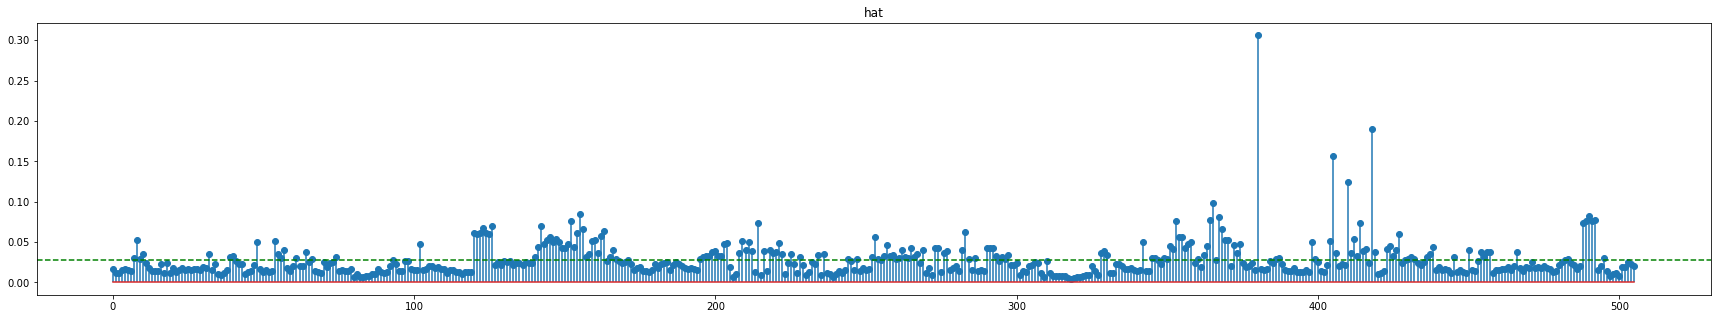

In [41]:
plt.figure(figsize=(30, 5))
plt.stem(hat)
plt.axhline(K/N, c='g', ls='--')
plt.title('hat')
plt.show()

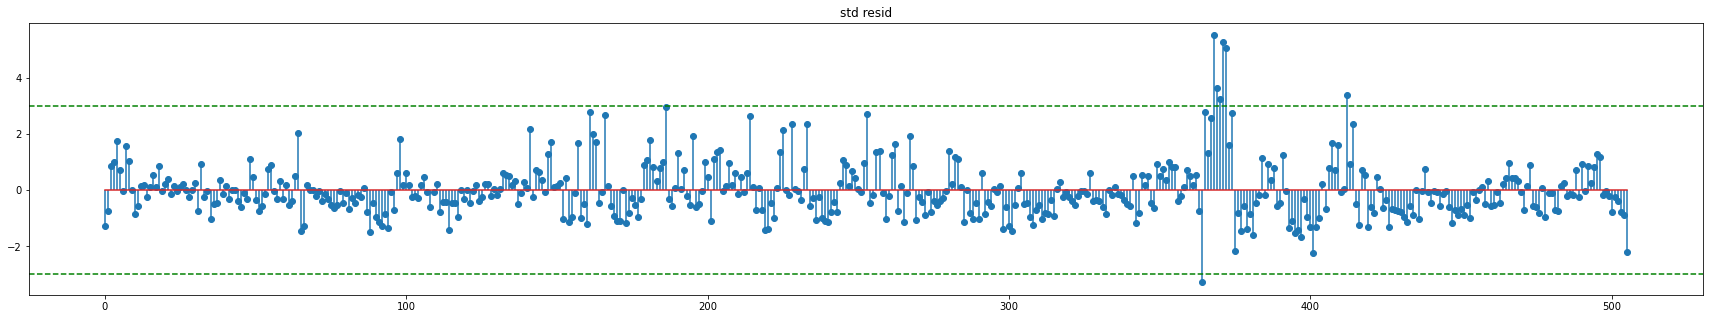

In [40]:
plt.figure(figsize=(30, 5))
plt.stem(std_resid)
plt.axhline(3, c='g', ls='--')
plt.axhline(-3, c='g', ls='--')
plt.title('std resid')
plt.show()

In [44]:
outlier_idx = np.where(cooks_dist > fox_recommendation)[0]
normal_idx = list(set(np.arange(N)).difference(set(outlier_idx)))

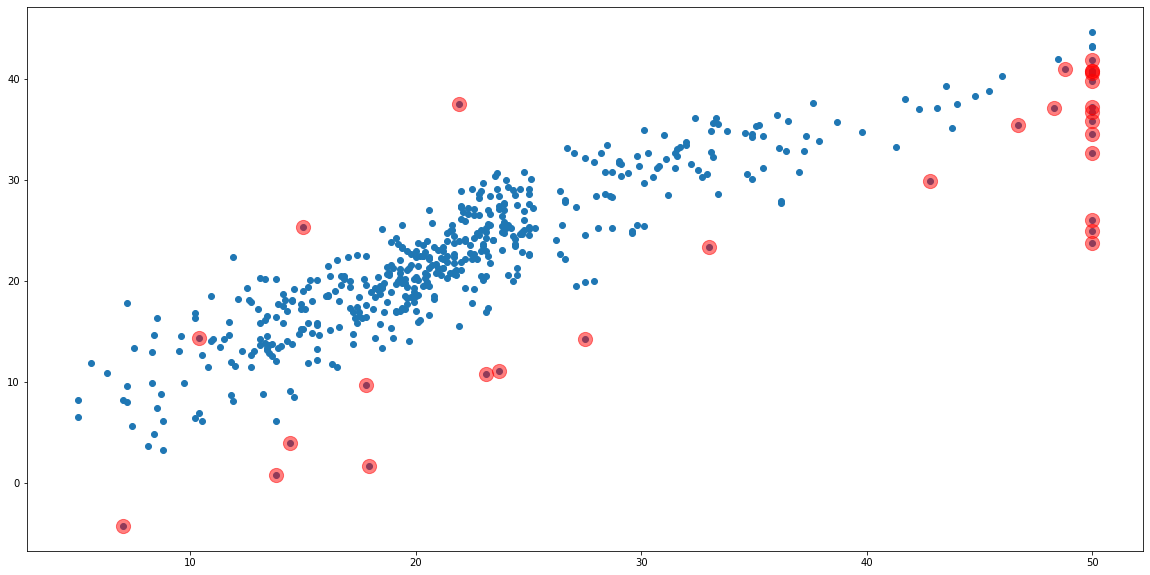

In [48]:
y_hat = rlt.predict(X)
plt.figure(figsize=(20, 10))
plt.scatter(y, y_hat)
plt.scatter(y.iloc[outlier_idx,:], rlt.predict(X.iloc[outlier_idx,:]), c='r', s=200, alpha=0.5)
plt.show()

In [119]:
X0_c, y_c = X0.iloc[normal_idx, :], y.iloc[normal_idx, :]

## 스케일링

In [121]:
sc = StandardScaler()
X0_c = pd.DataFrame(sc.fit_transform(X0_c), columns=X0_c.columns)
y_c = pd.DataFrame(sc.fit_transform(y_c), columns=y_c.columns)

## Linear Regression 1차

In [123]:
train_x0_c, test_x0_c, train_y_c, test_y_c = train_test_split(X0_c, y_c, test_size=0.3, random_state=0)

In [124]:
model_linear_reg = LinearRegression()
model_linear_reg = model_linear_reg.fit(train_x0_c, train_y_c)

In [125]:
pred_y = model_linear_reg.predict(test_x0_c)

In [126]:
r2_score(test_y_c, pred_y), mse(test_y_c, pred_y), mae(test_y_c, pred_y)

(0.7921669391502113, 0.19154659383781159, 0.264667081876637)

## 변수 변환 - 비선형 변수 추가.

In [162]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X0_c_poly = pd.DataFrame(poly.fit_transform(X0_c), columns=poly.get_feature_names(X0_c.columns))

## Polynomial Regression 1차

In [163]:
train_x0_c_poly, test_x0_c_poly, train_y_c, test_y_c = train_test_split(X0_c_poly, y_c, test_size=0.3, random_state=0)

In [164]:
model_poly_reg = LinearRegression()
model_poly_reg = model_poly_reg.fit(train_x0_c_poly, train_y_c)

In [165]:
pred_train_y = model_poly_reg.predict(train_x0_c_poly) 
pred_test_y = model_poly_reg.predict(test_x0_c_poly)

In [166]:
r2_score(train_y_c, pred_train_y), mse(train_y_c, pred_train_y), mae(train_y_c, pred_train_y)

(0.9464062421310273, 0.05529219408961998, 0.13623735868789183)

In [167]:
r2_score(test_y_c, pred_test_y), mse(test_y_c, pred_test_y), mae(test_y_c, pred_test_y)

(0.8509257869283707, 0.1373922783322747, 0.16145249219895813)

## 변수선택, 차원축소

In [186]:
vif_rlt = pd.DataFrame()
vif_rlt['vif'] = [vif(X0_c.values, i) for i in range(len(X0_c.columns))]
vif_rlt['feature'] = X0_c.columns
vif_rlt = vif_rlt.set_index('feature', drop=True)
vif_rlt

,vif
feature,
CRIM,1.995198
ZN,2.406908
INDUS,3.928436
CHAS,1.064702
NOX,4.483609
RM,2.161615
AGE,3.370794
DIS,4.061343
RAD,7.381202


In [185]:
feature = 'RAD'
X0_c.corr()[feature][X0_c.corr()[feature].map(lambda x: abs(x) > 0.5)]

CRIM     0.662861
INDUS    0.593976
NOX      0.613753
RAD      1.000000
TAX      0.906312
LSTAT    0.534549
Name: RAD, dtype: float64

In [ ]:
# 초기 변수들에 대해 VIF와 상관분석을 진행해본 결과 상관성이 높은 변수는 존재하지만 VIF가 10을 넘어가는 변수가 없기 때문에 별도의 변수 선택은 하지 않음.

In [198]:
feature_size = len(X0_c_poly.columns) - 1

In [201]:
# 부분 f검정을 실시하여 가장 중요한 변수들만 남기는 최적화 진행.
r2_scores = []
for i in range(1, feature_size + 1):
    temp_x0_c_poly = SelectKBest(f_classif, k=i).fit_transform(X0_c_poly, y_c)
    train_x0_c_poly, test_x0_c_poly, train_y_c, test_y_c = train_test_split(temp_x0_c_poly, y_c, test_size=0.3, random_state=0)
    model = LinearRegression().fit(train_x0_c_poly, train_y_c)
    pred_y = model.predict(test_x0_c_poly)
    r2_scores.append(r2_score(test_y_c, pred_y))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

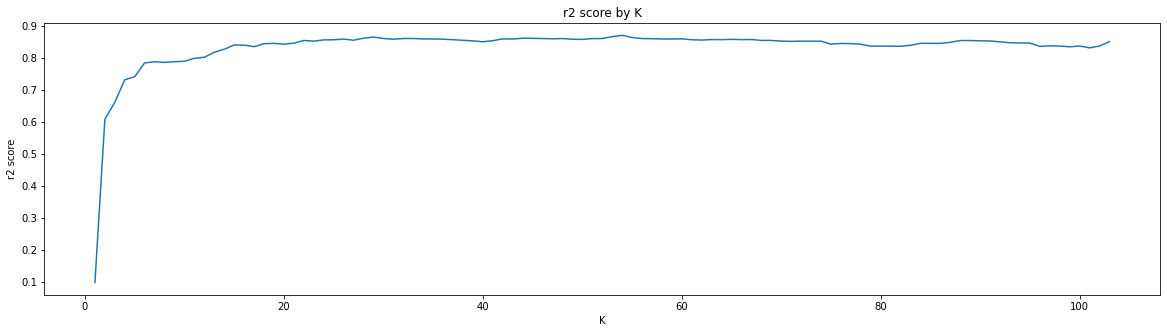

In [223]:
plt.figure(figsize=(20, 5))
plt.plot(range(1, feature_size + 1), r2_scores)
plt.title('r2 score by K')
plt.xlabel('K')
plt.ylabel('r2 score')
plt.show()

In [212]:
np.where(np.array(r2_scores) > 0.86)

(array([27, 28, 43, 44, 52, 53, 54], dtype=int64),)

In [219]:
selector = SelectKBest(f_classif, k=27)
X0_c_poly_k = selector.fit_transform(X0_c_poly, y_c)
selected_features = X0_c_poly.columns[selector.get_support()]

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [220]:
X0_c_poly_k = pd.DataFrame(X0_c_poly_k, columns=selected_features)
X0_c_poly_k.head()

,CRIM,INDUS,RM,TAX,LSTAT,CRIM INDUS,CRIM NOX,CRIM RM,CRIM AGE,CRIM DIS,...,INDUS RM,INDUS LSTAT,RM^2,RM RAD,RM TAX,RM PTRATIO,RAD LSTAT,TAX LSTAT,PTRATIO^2,LSTAT^2
0,-0.433807,-1.270495,0.527069,-0.647915,-1.145575,0.551150,0.051645,-0.228646,0.041894,-0.045932,...,-0.669638,1.455448,0.277801,-0.509195,-0.341496,-0.785791,1.106728,0.742235,2.222694,1.312343
1,-0.431030,-0.572187,0.269663,-0.971684,-0.528718,0.246630,0.307500,-0.116233,-0.169425,-0.226926,...,-0.154298,0.302525,0.072718,-0.229130,-0.262027,-0.085873,0.449246,0.513746,0.101408,0.279542
2,-0.431033,-0.572187,1.546662,-0.971684,-1.286444,0.246631,0.307502,-0.666662,0.104788,-0.226927,...,-0.884979,0.736086,2.392165,-1.314183,-1.502867,-0.492530,1.093078,1.250017,0.101408,1.654938
3,-0.430360,-1.289566,1.234098,-1.091598,-1.448073,0.554978,0.347800,-0.531107,0.339958,-0.452567,...,-1.591452,1.867386,1.522999,-0.904953,-1.347140,0.127884,1.061858,1.580713,0.010738,2.096914
4,-0.425507,-1.289566,1.483147,-1.091598,-1.093676,0.548719,0.343877,-0.631089,0.208378,-0.447463,...,-1.912616,1.410368,2.199724,-1.087578,-1.619000,0.153692,0.801982,1.193855,0.010738,1.196127


## Polynomial Regression 2차

In [226]:
model_poly_reg2 = sm.OLS(y_c, sm.add_constant(X0_c_poly_k))
rlt_poly_reg2 = model_poly_reg2.fit()

In [227]:
rlt_poly_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     137.7
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          3.19e-198
Time:                        11:15:48   Log-Likelihood:                -145.53
No. Observations:                 477   AIC:                             347.1
Df Residuals:                     449   BIC:                             463.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6600      0.175     -3.778      0.000      -1.003      -0.317
CRIM            -1.6093      0.418     -3.852      0.000      -2.430      -0.788
INDUS            0.4509      0.164      2.750      0.006       0.129       0.773
RM               0.3257      0.027     12.256      0.000       0.274       0.378
TAX              0.0010      0.091      0.011      0.991      -0.178       0.180
LSTAT           -0.3818      0.037    -10.370      0.000      -0.454      -0.309
CRIM INDUS       1.2079      0.413      2.921      0.004       0.395       2.021
CRIM NOX        -0.2055      0.062     -3.327      0.001      -0.327      -0.084
CRIM RM          0.0581      0.042      1.379      0.169      -0.025       0.141
CRIM AGE         0.1992      0.052      3.814      0.000       0.097       0.302
CRIM DIS         0.3660      0.067      5.449      0.000       0.234       0.498
CRIM RAD        -0.4424      0.115     -3.836      0.000      -0.669      -0.216
CRIM TAX         0.6379      0.246      2.597      0.010       0.155       1.121
CRIM PTRATIO     0.4033      0.071      5.706      0.000       0.264       0.542
CRIM LSTAT       0.0908      0.035      2.589      0.010       0.022       0.160
ZN RM            0.0547      0.027      1.993      0.047       0.001       0.109
ZN PTRATIO       0.0520      0.021      2.469      0.014       0.011       0.093
ZN LSTAT        -0.0553      0.033     -1.662      0.097      -0.121       0.010
INDUS RM         0.0013      0.052      0.025      0.980      -0.102       0.104
INDUS LSTAT     -0.0723      0.044     -1.649      0.100      -0.158       0.014
RM^2             0.0730      0.015      5.035      0.000       0.045       0.102
RM RAD          -0.0633      0.074     -0.852      0.395      -0.209       0.083
RM TAX          -0.0884      0.085     -1.042      0.298      -0.255       0.078
RM PTRATIO      -0.0749      0.024     -3.160      0.002      -0.121      -0.028
RAD LSTAT       -0.1423      0.068     -2.083      0.038      -0.277      -0.008
TAX LSTAT       -0.0629      0.075     -0.835      0.404      -0.211       0.085
PTRATIO^2       -0.0227      0.021     -1.084      0.279      -0.064       0.018
LSTAT^2          0.0790      0.020      3.874      0.000       0.039       0.119
==============================================================================
Omnibus:                       53.309   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.821
Skew:                           0.605   Prob(JB):                     9.58e-27
Kurtosis:                       5.137   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [245]:
train_x, test_x, train_y, test_y = train_test_split(X0_c_poly_k, y_c, test_size=0.2, random_state=0)

In [246]:
model = LinearRegression().fit(train_x, train_y)

In [247]:
y_pred_train, y_pred_test = model.predict(train_x), model.predict(test_x)
r2_score(train_y, y_pred_train), r2_score(test_y, y_pred_test)

(0.8945538723477148, 0.8727646784084724)

In [ ]:
# 훈련데이터에 대한 성능은 감소하였으나 테스트데이터에 대한 점수가 변화가 없다.
# 따라서 27개의 변수를 가져가기로 한다.

## 규제화 - 릿지, 라쏘, 엘라스틱넷

In [250]:
model_ridge = Ridge().fit(train_x, train_y)
model_lasso = Lasso().fit(train_x, train_y)
model_elasticnet = ElasticNet().fit(train_x, train_y)

In [251]:
y_pred_ridge = model_ridge.predict(test_x)
y_pred_lasso = model_lasso.predict(test_x)
y_pred_elasticnet = model_elasticnet.predict(test_x)

In [252]:
r2_score(test_y, y_pred_ridge), r2_score(test_y, y_pred_lasso), r2_score(test_y, y_pred_elasticnet)

(0.8718290041515818, -0.014506538326229945, 0.36531010384500606)